In [5]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



data = pd.read_csv("/content/train_FD001.txt",sep="\s+",header=None)


In [6]:
ENAMING_DICT = {0: "engine_num",1:"cycle_num",2:"oper_set_1",3:"oper_set_2",4:"oper_set_3",5:"temp_fan_inlet",
                 6:"temp_lpc_outlet",7:"temp_hpc_outlet",8:"temp_lpt_outlet",9:"px_fan_inlet",10:"px_by_duct",11:"px_hpc_outlet",
                 12:"phys_fan_speed",13:"phys_core_speed",14:"engine_px_ratio",15:"stat_px_hpc_out",16:"fuel_flow_ratio",17:"corr_fan_speed",
                 18:"corr_core_speed",19:"bypass_ratio",20:"fuel_air_ratio",21:"bleed_enthalpy",22:"demanded_fan_speed",23:"demanded_corr_fan_speed",
                 24:"hpt_coolant_bleed",25:"lpt_coolant_bleed"}

In [7]:
train_001 = pd.read_csv("../content/train_FD001.txt",sep="\s+",header=None)
train_001


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [8]:
data.rename(columns=ENAMING_DICT, inplace=True)

# Verify column names
print("Columns in DataFrame:", data.columns)

Columns in DataFrame: Index(['engine_num', 'cycle_num', 'oper_set_1', 'oper_set_2', 'oper_set_3',
       'temp_fan_inlet', 'temp_lpc_outlet', 'temp_hpc_outlet',
       'temp_lpt_outlet', 'px_fan_inlet', 'px_by_duct', 'px_hpc_outlet',
       'phys_fan_speed', 'phys_core_speed', 'engine_px_ratio',
       'stat_px_hpc_out', 'fuel_flow_ratio', 'corr_fan_speed',
       'corr_core_speed', 'bypass_ratio', 'fuel_air_ratio', 'bleed_enthalpy',
       'demanded_fan_speed', 'demanded_corr_fan_speed', 'hpt_coolant_bleed',
       'lpt_coolant_bleed'],
      dtype='object')


In [9]:
if 'engine_num' in data.columns and 'cycle_num' in data.columns: # Preprocess the data and it will check that the other columns are present in the data column using
#  scalarr standard
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data.drop(columns=["engine_num", "cycle_num",]))

In [10]:
# in this column nan values will be detect,,,, there should be no Nan value in data

required_columns = ["engine_num", "cycle_num"]
if all(col in data.columns for col in required_columns):

    if data.isna().sum().sum() == 0:

        scaler = StandardScaler()
        try:
            data_scaled = scaler.fit_transform(data.drop(columns=["engine_num", "cycle_num"]))
            print("Data scaling successful.")
        except KeyError as e:
            print(f"Error during scaling: {e}")

Data scaling successful.


In [11]:
engine_groups = train_001.groupby(0) # this line group the train001 dataframe by first column engine no

In [12]:
# in this code i make a directory of data which i saved in input_data_windowmore_30 if it does not exist
import os

output_dir_30 = '../input_data_windowmore30'

os.makedirs(output_dir_30, exist_ok=True)

for engine_num, group in engine_groups:
    filename = f'engine_{int(engine_num)}.csv'
    group.to_csv(f'{output_dir_30}/{filename}', index=False, header=False)

print(f'Files have been saved in {output_dir_30} directory.')

Files have been saved in ../input_data_windowmore30 directory.


In [13]:
# in this code i make a directory of data which i saved in input_data_window_1 if it does not exist
output_dir_1 = '../input_data_window_1'

# Create the directory if it doesn't exist
os.makedirs(output_dir_1, exist_ok=True)

for index, row in train_001.iterrows():
    row_df = row.to_frame().T
    filename = f'engine_{int(row[0])}_cycle_{int(row[1])}.csv'
    row_df.to_csv(f'{output_dir_1}/{filename}', index=False, header=False)

print(f'Files have been saved in {output_dir_1} directory.')

Files have been saved in ../input_data_window_1 directory.


In [14]:

# in this code i make a directory of data which i saved in input_data_windowmore_5 if it does not exist
output_dir_5 = '../input_data_window_5'

# Create the directory if it doesn't exist
os.makedirs(output_dir_5, exist_ok=True)

for engine_num, group in engine_groups:
    num_rows = len(group)
    for start in range(0, num_rows - num_rows % 5, 5):
        window = group.iloc[start:start + 5]
        if len(window) == 5:
            filename = f'engine_{int(engine_num)}_cycle_{int(window.iloc[0][1])}_to_{int(window.iloc[-1][1])}.csv'
            window.to_csv(f'{output_dir_5}/{filename}', index=False, header=False)

print(f'Files have been saved in {output_dir_5} directory.')


Files have been saved in ../input_data_window_5 directory.


In [15]:
# in this code i make a directory of data which i saved in input_data_windowmore_10 if it does not exist
output_dir_10 = '../input_data_window_10'

# Create the directory if it doesn't exist
os.makedirs(output_dir_10, exist_ok=True)

for engine_num, group in engine_groups:
    num_rows = len(group)
    # Only process groups with at least 10 rows
    for start in range(0, num_rows - num_rows % 10, 10):
        window = group.iloc[start:start + 10]
        if len(window) == 10:
            filename = f'engine_{int(engine_num)}_cycle_{int(window.iloc[0][1])}_to_{int(window.iloc[-1][1])}.csv'
            window.to_csv(f'{output_dir_10}/{filename}', index=False, header=False)

print(f'Files have been saved in {output_dir_10} directory.')


Files have been saved in ../input_data_window_10 directory.


In [16]:
# in this code i make a directory of data which i saved in input_data_window_30 if it does not exist
output_dir_30 = '../input_data_window_30'

# Create the directory if it doesn't exist
os.makedirs(output_dir_30, exist_ok=True)

for engine_num, group in engine_groups:
    num_rows = len(group)
    for start in range(0, num_rows - num_rows % 30, 30):
        window = group.iloc[start:start + 30]
        if len(window) == 30:
            filename = f'engine_{int(engine_num)}_cycle_{int(window.iloc[0][1])}_to_{int(window.iloc[-1][1])}.csv'
            window.to_csv(f'{output_dir_30}/{filename}', index=False, header=False)

print(f'Files have been saved in {output_dir_30} directory.')


Files have been saved in ../input_data_window_30 directory.


In [17]:
input_dir = '../input_data_window_1'

# List all CSV files in the directory
files = [f for f in os.listdir(input_dir) if f.endswith('.csv')]

# csv reads into a sepreate pandas dataframe
data_frames = [pd.read_csv(os.path.join(input_dir, file), header=None) for file in files]


data = pd.concat(data_frames, ignore_index=True)# individual dtaframe cocentrated into a single dataframe for processing.

# StandardScaler is used to normalize the data and guarantee that its mean is 0 and its standard deviation is 1,
# Numerous machine learning techniques, such as anomaly detection, depend on this.
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# The starting point of the Isolation Forest model is a predetermined contamination rate, or the percentage of expected abnormalities in the data,
#  Next, using the scaled data, the model is fitted or trained.
model = IsolationForest(contamination=0.01)  #expecting 1% of data points are anomalies

# Fit the model
model.fit(data_scaled)

# Anomalies in the scaled data are predicted by the trained model. With the addition of the predictions,
# the original DataFrame now has a new column called anomaly, where 1 denotes normal data and -1 an anomaly.

predictions = model.predict(data_scaled)
# -1 indicates an anomaly, 1 indicates normal
data['anomaly'] = predictions
# A new CSV file is created and contains the DataFrame with the anomaly detection results.
# The DataFrame is written to this file without including the index, and the file path is specified.

results_file = '../input_data_window_1_with_anomalies.csv'
data.to_csv(results_file, index=False)

print(f'Anomaly detection results have been saved to {results_file}')

Anomaly detection results have been saved to ../input_data_window_1_with_anomalies.csv


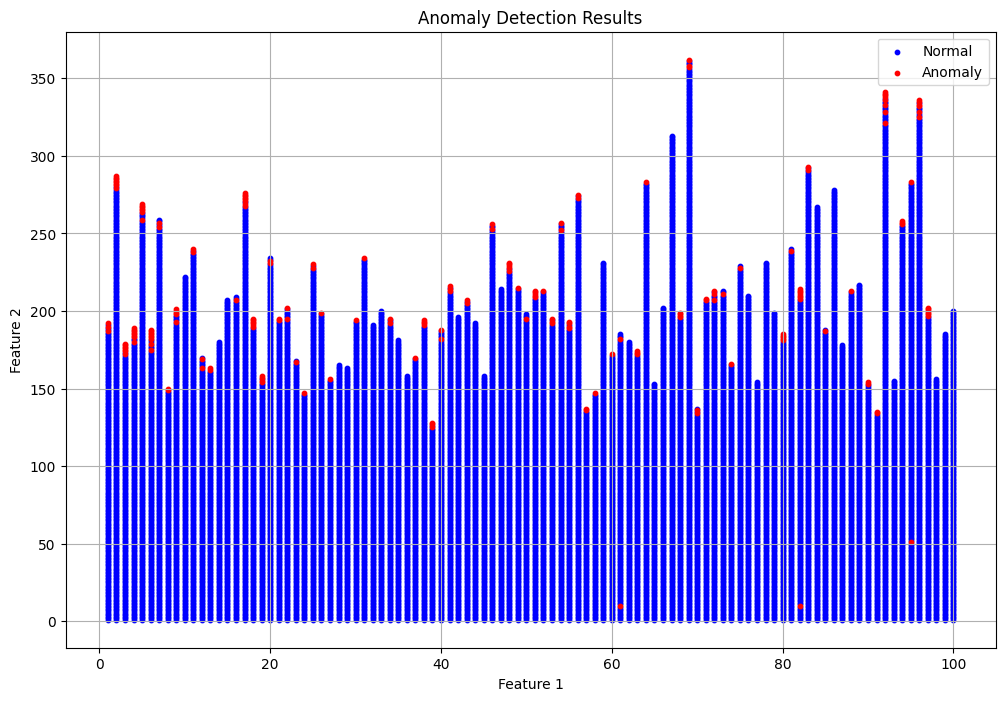

<Figure size 640x480 with 0 Axes>

In [18]:
input_dir = '../input_data_window_1'

files = [f for f in os.listdir(input_dir) if f.endswith('.csv')]

data_frames = [pd.read_csv(os.path.join(input_dir, file), header=None) for file in files]

data = pd.concat(data_frames, ignore_index=True)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

model = IsolationForest(contamination=0.01)
model.fit(data_scaled)

predictions = model.predict(data_scaled)

data['anomaly'] = predictions

plt.figure(figsize=(12, 8))

#  -1 indicates an anomaly, 1 indicates normal
normal_data = data[data['anomaly'] == 1]
plt.scatter(normal_data[0], normal_data[1], color='blue', label='Normal', s=10)

# Ploting the anomaly data points
anomaly_data = data[data['anomaly'] == -1]
plt.scatter(anomaly_data[0], anomaly_data[1], color='red', label='Anomaly', s=10)

# lebeliing and legending
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Anomaly Detection Results')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

# Optionally, save the plot to a file
plt.savefig('../input_data_window_1_anomaly_detection_plot.png')

In [19]:
input_dir = '../input_data_window_30'

files = [f for f in os.listdir(input_dir) if f.endswith('.csv')]

data_frames = [pd.read_csv(os.path.join(input_dir, file), header=None) for file in files]

data = pd.concat(data_frames, ignore_index=True)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

model = IsolationForest(contamination=0.01)  # Adjust contamination based on expected anomaly rate


model.fit(data_scaled)

predictions = model.predict(data_scaled)
data['anomaly'] = predictions

# Save results to a new CSV file
results_file = '../input_data_window_30_with_anomalies.csv'
data.to_csv(results_file, index=False)

print(f'Anomaly detection results have been saved to {results_file}')

Anomaly detection results have been saved to ../input_data_window_30_with_anomalies.csv


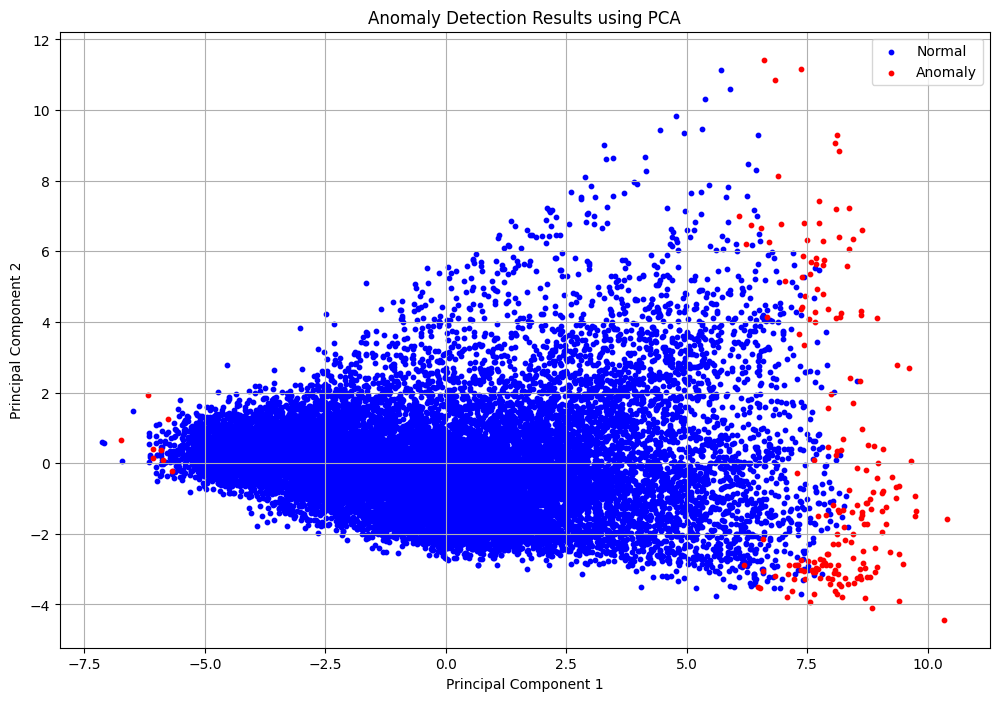

<Figure size 640x480 with 0 Axes>

In [20]:

from sklearn.decomposition import PCA

input_dir = '../input_data_window_30'

files = [f for f in os.listdir(input_dir) if f.endswith('.csv')]

data_frames = [pd.read_csv(os.path.join(input_dir, file), header=None) for file in files]

data = pd.concat(data_frames, ignore_index=True)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

model = IsolationForest(contamination=0.01)
model.fit(data_scaled)


predictions = model.predict(data_scaled)
data['anomaly'] = predictions


pca = PCA(n_components=2)  #reason to choose 2 is PCA reduce the data to 2 principal components.
data_pca = pca.fit_transform(data_scaled)

#creating a DataFrame for PCA results
data_pca_df = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])
data_pca_df['anomaly'] = data['anomaly']

# Scatter Ploting
plt.figure(figsize=(12, 8))

# Plot normal data points
normal_data = data_pca_df[data_pca_df['anomaly'] == 1]
plt.scatter(normal_data['PC1'], normal_data['PC2'], color='blue', label='Normal', s=10)

# Plot data points having anomalies
anomaly_data = data_pca_df[data_pca_df['anomaly'] == -1]
plt.scatter(anomaly_data['PC1'], anomaly_data['PC2'], color='red', label='Anomaly', s=10)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Anomaly Detection Results using PCA')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

# Optionally, save the plot to a file
plt.savefig('../input_data_window_30_anomaly_detection_pca_plot.png')

In [21]:
input_dir = '../input_data_window_5'

files = [f for f in os.listdir(input_dir) if f.endswith('.csv')]

data_frames = [pd.read_csv(os.path.join(input_dir, file), header=None) for file in files]

data = pd.concat(data_frames, ignore_index=True)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

model = IsolationForest(contamination=0.01)  # Adjust contamination based on expected anomaly rate

model.fit(data_scaled)

predictions = model.predict(data_scaled)
# -1 indicates an anomaly, 1 indicates normal
data['anomaly'] = predictions

# csv results saving
results_file = '../input_data_window_30_with_anomalies.csv'
data.to_csv(results_file, index=False)

print(f'Anomaly detection results have been saved to {results_file}')

Anomaly detection results have been saved to ../input_data_window_30_with_anomalies.csv


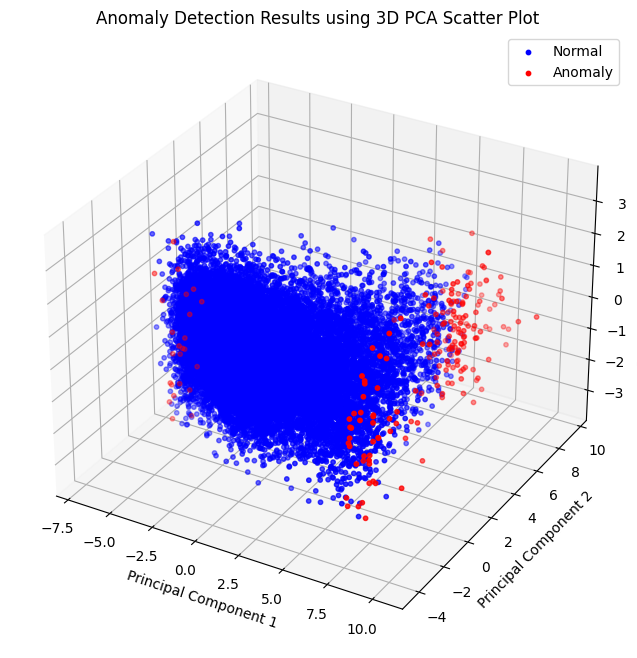

<Figure size 640x480 with 0 Axes>

In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os

# Define input directory
input_dir = '../input_data_window_5'

# List all CSV files in the input directory
files = [f for f in os.listdir(input_dir) if f.endswith('.csv')]

# Read all CSV files into DataFrames
data_frames = [pd.read_csv(os.path.join(input_dir, file), header=None) for file in files]

# Concatenate all DataFrames into a single DataFrame
data = pd.concat(data_frames, ignore_index=True)

# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Initialize PCA with 3 components
pca = PCA(n_components=3)
data_pca = pca.fit_transform(data_scaled)

# Fit the Isolation Forest model
model = IsolationForest(contamination=0.01)
model.fit(data_scaled)

# Make predictions
predictions = model.predict(data_scaled)
# -1 indicates an anomaly, 1 indicates normal
data['anomaly'] = predictions

# Create DataFrame for PCA data
data_pca_df = pd.DataFrame(data_pca, columns=['PC1', 'PC2', 'PC3'])
data_pca_df['anomaly'] = data['anomaly']

# Create 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot normal data points
normal_data = data_pca_df[data_pca_df['anomaly'] == 1]
ax.scatter(normal_data['PC1'], normal_data['PC2'], normal_data['PC3'], color='blue', label='Normal', s=10)

# Plot anomaly data points
anomaly_data = data_pca_df[data_pca_df['anomaly'] == -1]
ax.scatter(anomaly_data['PC1'], anomaly_data['PC2'], anomaly_data['PC3'], color='red', label='Anomaly', s=10)

# Set labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('Anomaly Detection Results using 3D PCA Scatter Plot')
ax.legend()

# Show plot
plt.show()

# Optionally, save the plot to a file
plt.savefig('../input_data_window_5_anomaly_detection_3d_pca_plot.png')

In [25]:
input_dir = '../input_data_window_10'

files = [f for f in os.listdir(input_dir) if f.endswith('.csv')]

data_frames = [pd.read_csv(os.path.join(input_dir, file), header=None) for file in files]

data = pd.concat(data_frames, ignore_index=True)

# Standardize is important for anomaly detection, Assuming data have no headers or specific labels.

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


# Initialize Isolation Forest & train the anomaly detection Model
model = IsolationForest(contamination=0.01)

# Fit the model
model.fit(data_scaled)

# Apply the Model and Detect Anomalies
# Predict anomalies
predictions = model.predict(data_scaled)
# -1 indicates an anomaly, 1 indicates normal
data['anomaly'] = predictions

# Save results to a new CSV file
results_file = '../input_data_window_10_with_anomalies.csv'
data.to_csv(results_file, index=False)

print(f'Anomaly detection results have been saved to {results_file}')

Anomaly detection results have been saved to ../input_data_window_10_with_anomalies.csv


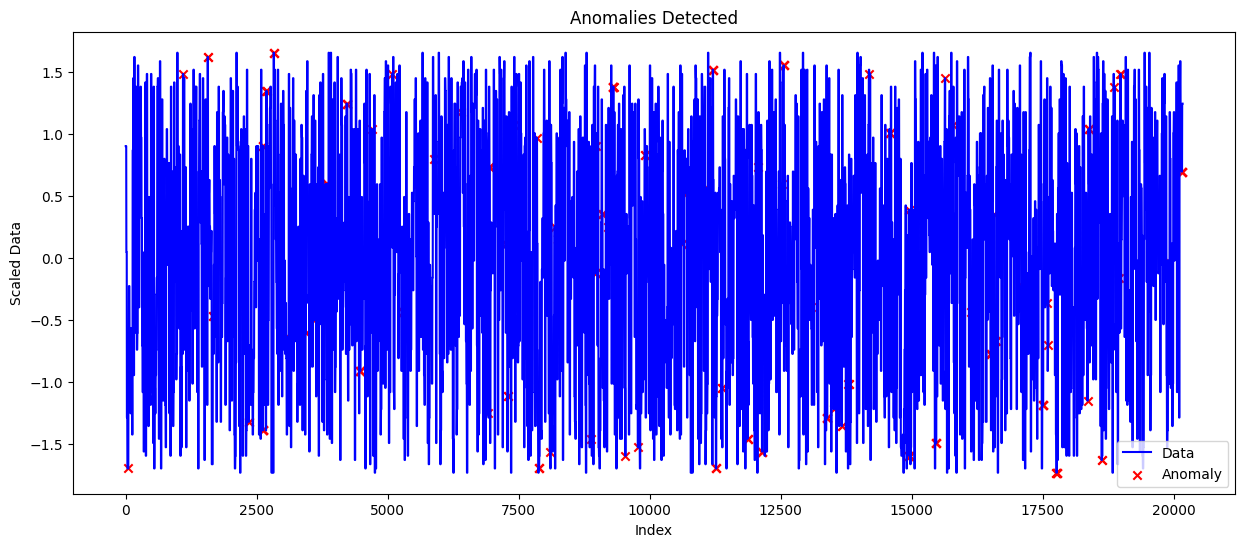

<Figure size 640x480 with 0 Axes>

In [26]:
input_dir = '../input_data_window_10'

# List all CSV files in the directory
files = [f for f in os.listdir(input_dir) if f.endswith('.csv')]

# Load all data into a list of DataFrames
data_frames = [pd.read_csv(os.path.join(input_dir, file), header=None) for file in files]

# Concatenate all DataFrames into a single DataFrame
data = pd.concat(data_frames, ignore_index=True)

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Train Anomaly Detection Model
model = IsolationForest(contamination=0.01)
model.fit(data_scaled)

# Detection of anomalies
predictions = model.predict(data_scaled)
data['anomaly'] = predictions

# Plot the actual data and highlight the anomalies
plt.figure(figsize=(15, 6))
plt.plot(data.index, data_scaled[:, 0], label='Data', color='blue')
anomalies = data[data['anomaly'] == -1]
plt.scatter(anomalies.index, data_scaled[anomalies.index, 0], color='red', label='Anomaly', marker='x')
plt.title('Anomalies Detected')
plt.xlabel('Index')
plt.ylabel('Scaled Data')
plt.legend()
plt.show()

# Optionally, save the plot to a file
plt.savefig('../input_data_window_10_anomaly_detection_scatter_plot.png')

In [27]:
pip install h5py joblib


In [30]:
import pandas as pd
import numpy as np
import joblib
import h5py
import os
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Function to load and concatenate all CSV files in a directory
def load_data_from_directory(directory):
    if not os.path.exists(directory):
        print(f"Directory not found: {directory}")
        return pd.DataFrame()  # Return an empty DataFrame if directory does not exist

    files = [f for f in os.listdir(directory) if f.endswith('.csv')]
    if not files:
        print(f"No CSV files found in directory: {directory}")
    data_frames = [pd.read_csv(os.path.join(directory, file), header=None) for file in files]
    return pd.concat(data_frames, ignore_index=True) if data_frames else pd.DataFrame()

# Define directories
directories = ['../input_data_window_1', '../input_data_window_5', '../input_data_window_10', '../input_data_window_30']

# Load and concatenate data from all directories
all_data_frames = []
for directory in directories:
    df = load_data_from_directory(directory)
    if not df.empty:
        all_data_frames.append(df)

if not all_data_frames:
    raise ValueError("No data was loaded from any of the specified directories.")

all_data = pd.concat(all_data_frames, ignore_index=True)

# Check if all_data is empty after concatenation
if all_data.empty:
    raise ValueError("No data available after concatenation. Please check the directories and file paths.")

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(all_data)

# Train Isolation Forest model
model = IsolationForest(contamination=0.01)
model.fit(data_scaled)

# Save the model using joblib
joblib_file = '../isolation_forest_model.pkl'
joblib.dump(model, joblib_file)
print(f'Model has been saved to {joblib_file}')

# Convert the joblib file to an HDF5 file
with open(joblib_file, 'rb') as f:
    model_data = f.read()

# Convert binary data to a numpy array of uint8
model_data_array = np.frombuffer(model_data, dtype=np.uint8)

# Save the numpy array to HDF5
with h5py.File('../isolation_forest_model.h5', 'w') as hf:
    hf.create_dataset('model', data=model_data_array)

print('Model has been saved as HDF5 file: ../isolation_forest_model.h5')

# Optionally, remove the intermediate joblib file
os.remove(joblib_file)


Model has been saved to ../isolation_forest_model.pkl
Model has been saved as HDF5 file: ../isolation_forest_model.h5
